In [1]:
import os
import glob
import json
import pymworks
import re
import datautils
import copy
import math
import time

import multiprocessing as mp
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import cPickle as pkl
from cPickle import PicklingError

import scipy.stats as spstats
import utils as util
import process_datafiles as processd

import pprint

pp = pprint.PrettyPrinter(indent=4)

def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]


/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/pymworks/protocol/__init__.py:15: UserWarning: networkx is required for pymworks.protocols.states
  warnings.warn('networkx is required for pymworks.protocols.states')
/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/datautils/__init__.py:22: UserWarning: datautils.mongo failed to import with: No module named pymongo
  warnings.warn('datautils.mongo failed to import with: %s' % E)
utils.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/e

# Set root and meta

In [2]:
rootdir = '/n/coxfs01/behavior-data'
paradigm = 'threeport'

metadata = util.get_metadata(paradigm, rootdir=rootdir, create_meta=False)


Loading existing metadata...


# Load 1 animal

#### Find correct sessions

In [34]:
def check_against_manual_sorting(animalid, phase, paradigm='threeport', 
                                 rootdir='/n/coxfs01/behavior-data'):
    '''
    Based on JM's sorting, expects:
        PHASE:
            2_size
            3_deptrotr_l
            4_fullcross, etc.
            
        os.path.join(by_phase_cohort_dir, 'AL13 - AL16', <PHASE>, AL*_YYMMDD.mwk)
    
    '''
    
    cohort = re.search('(\D+)', animalid).group(0)
    sorted_cohort_dir = os.path.join(rootdir, paradigm, 'by_cohort', '%s_Cohort' % cohort, 'sorted', '_data')

    if cohort in ['AM', 'AN']:
        # 'PHASE_description'
        sorted_dfns = sorted(glob.glob(os.path.join(sorted_cohort_dir, '%i_*' % phase, \
                                                    '%s*' % cohort, '%s_*.mwk' % animalid)), key=natural_keys)
    elif cohort == 'AL':
#         sorted_dfns = sorted(glob.glob(os.path.join(sorted_cohort_dir, '_current*', '%i_*' % phase, \
#                                                     '%s*' % cohort, '%s_*.mwk' % animalid)), key=natural_keys)
        sorted_dfns = sorted(glob.glob(os.path.join(rootdir, paradigm, 'by_phase', '%s*' % cohort, 
                                                          '%i_*' % phase, '%s*' % cohort, 
                                                          '%s_*.mwk' % animalid)), key=natural_keys)

    
    elif cohort == 'AK':
        sorted_dfns = sorted(glob.glob(os.path.join(sorted_cohort_dir, '_regular*', '%i_*' % phase, \
                                                    '%s*' % cohort, '%s_*.mwk' % animalid)), key=natural_keys)
    
    elif cohort == 'AJ':
        sorted_dfns = sorted(glob.glob(os.path.join(rootdir, paradigm, 'by_cohort', '%s_Cohort' % cohort, 'phase%i' % phase,
                                         '%s*' % cohort, '%s_*.mwk' % animalid)), key=natural_keys)
    else:
        sorted_dfns = []
    
    print("[%s] %i datafiles for phase %i" % (animalid, len(sorted_dfns), phase))
    included_sessions = sorted(list(set([util.parse_datafile_name(dfn)[1] for dfn in sorted_dfns])), key=natural_keys)
    return [int(i) for i in included_sessions]



In [4]:

# if phase == 2:
#     currdf = df[((df['FlagStaircaseDeptRotRight']==0) | (df['FlagStaircaseDeptRotLeft']==0))
#                 & (df['FlagStaircaseSize']==1)
#                 & (df['FlagAlwaysReward']==0)]
# elif phase == 3:
#     currdf = df[((df['FlagStaircaseDeptRotRight']==0) | (df['FlagStaircaseDeptRotLeft']==0))
#                 & (df['FlagStaircaseSize']==0)
#                 & (df['FlagAlwaysReward']==0)]

# elif phase == 4:
#     currdf = df[((df['FlagStaircaseDeptRotRight']==1) | (df['FlagStaircaseDeptRotLeft']==1))
#                 & (df['FlagStaircaseSize']==0)
#                 & (df['FlagAlwaysReward']==0)]
    
# print("Phase: %i" % phase)
# sorted(currdf['session'].unique())


In [5]:
# for session in included_sessions:
#     print("--- %i" % int(session))
#     for fl in training_flag_names:
#         print(fl, df[df['session']==int(session)][fl].unique())

#### Check/test with 1 animal's datafile

In [ ]:
# animalid = 'AL1'
# df, new_s = processd.get_animal_df(animalid, paradigm, metadata, create_new=False, rootdir=rootdir)
# df['object'] = [re.findall('(\d{1})', re.search('Blob(\D+\d{1})', imname).group(0).split('_')[1])[0]\
#                 if 'morph' not in imname else 'morph' 
#                 for imname in df['name']]

In [9]:
# phase = 3
# included_sessions = check_against_manual_sorting(animalid, phase)

# included_sessions

In [7]:


#### Get dataframe
training_flag_names = ['FlagAlwaysReward', #
                       'FlagStaircaseSize',
                       'FlagStaircaseDeptRotLeft', #
                       'FlagStaircaseDeptRotRight', 
                       'FlagShowOnlyTrainedAxes']
# ignore_keys = ['file_hash', 'filename', 'type']



In [71]:
# currdf = df[df['session'].isin(included_sessions)]

In [38]:
reload(processd)
reload(util)

process_datafiles.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/julianarhee/anaconda2/envs/behavior/lib/python2.7/

<module 'utils' from 'utils.py'>

# Get all animasl in cohort

In [ ]:
phase=3

dflist = []
for (cohort, animalid), g in metadata.groupby(['cohort', 'animalid']):
    if cohort in ['AG', 'AJ']:
        continue
#     if cohort != 'AM':
#         continue
#     if 'AL1' not in animalid:
#         continue
    df, new_s = processd.get_animal_df(animalid, paradigm, metadata, create_new=False, rootdir=rootdir)
    df['object'] = [re.findall('(\d{1})', re.search('Blob(\D+\d{1})', imname).group(0).split('_')[1])[0]\
                    if 'morph' not in imname else 'morph' 
                    for imname in df['name']]

    included_sessions = check_against_manual_sorting(animalid, phase)
    currdf = df[df['session'].isin(included_sessions)].copy()
    currdf['animalid'] = [animalid for _ in np.arange(0, len(currdf))]
    dflist.append(currdf)
df = pd.concat(dflist, axis=0)

... loading existing df
[AK1] 0 datafiles for phase 3
... loading existing df


In [15]:
df['animalid'].unique()

array(['AM1', 'AM11', 'AM2', 'AM3', 'AM4', 'AM5', 'AM6', 'AM8', 'AM9'],
      dtype=object)

#### Group by features

In [22]:
# odf=currdf.copy() #currdf[(currdf['object']=='1')].copy()

#features = ['depth_rotation', 'size', 'rotation', 'object', 'response_time', 'outcome', 'session']
#odf = odf[features]

In [16]:
df['depth_rotation'].unique()

array([  0,  -5, -10, -15, -20, -25, -30, -35, -40, -45, -50, -55, -60,
         5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60])

In [17]:
planar_rots = sorted(df['rotation'].unique())
depth_rots = sorted(df['depth_rotation'].unique())
print("N in-plane: %i" % len(planar_rots))
print("N in-depth: %i" % len(depth_rots))


N in-plane: 1
N in-depth: 25


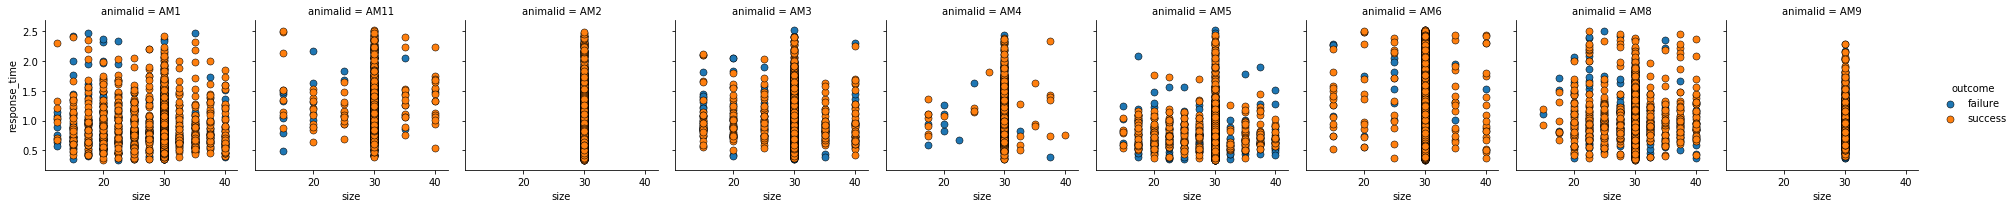

In [18]:
# For size
kws = dict(s=50, linewidth=.5, edgecolor="k")
g = sns.FacetGrid(df, col='animalid', hue='outcome')
g = (g.map(pl.scatter, 'size', "response_time", **kws)
     .add_legend())


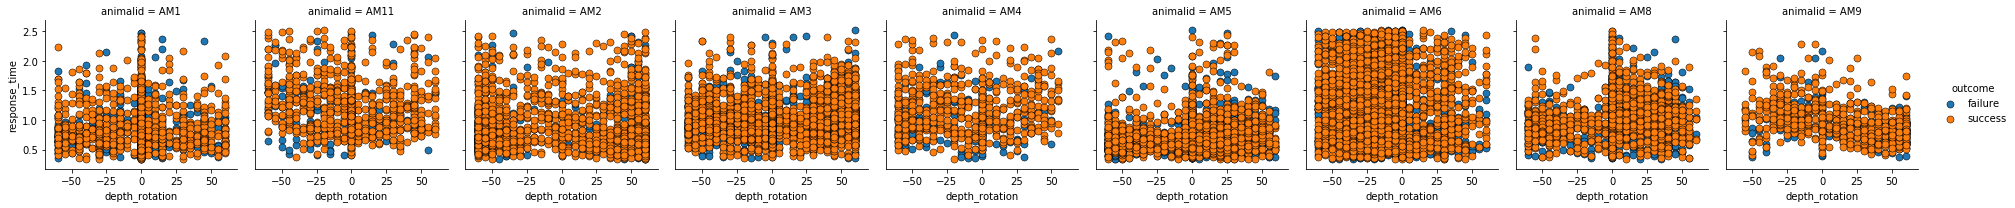

In [19]:
# For rotation
kws = dict(s=50, linewidth=.5, edgecolor="k")
g = sns.FacetGrid(df, col='animalid', hue='outcome')
g = (g.map(pl.scatter, 'depth_rotation', "response_time", **kws)
     .add_legend())


In [20]:
df['object'].unique()

array(['1', '2'], dtype=object)

#### visualize better

In [21]:
df['abs_depth_rotation'] = np.abs(df['depth_rotation'])
df['abs_planar_rotation'] = np.abs(df['rotation'])

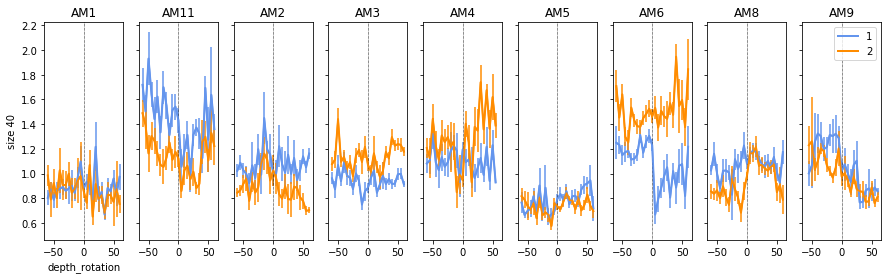

In [30]:
currdf = df[df['size']==30]

curr_feature = 'depth_rotation'
metric = 'response_time'
object_colors = {'1': 'cornflowerblue', '2': 'darkorange'}
outcome_styles = {'success': '-', 'failure': ':', 'ignore': ':'}

n_animals = len(currdf['animalid'].unique())
n_sizes = len(currdf['size'].unique())

fig, axes = pl.subplots(1, n_animals, figsize=(15,4), sharex=True, sharey=True)

for ai, (animalid, a_df) in enumerate(currdf.groupby(['animalid'])):
    ax = axes[ai]
    for obj, obj_df in a_df.groupby(['object']):

        for outcome, outcome_df in obj_df.groupby(['outcome']):
            if outcome == 'failure':
                continue
            yv = [g[metric].values for r, g in outcome_df.groupby([curr_feature])]
            xv = [np.array([r for _ in np.arange(len(g))]) for r, g in outcome_df.groupby([curr_feature])]

            mean_xs = [np.mean(x) for x in xv]
            mean_ys = [np.mean(y) for y in yv]
            sem_ys = [spstats.sem(y) for y in yv]

            line_color = object_colors[obj]
            line_style = outcome_styles[outcome]

            ax.plot(mean_xs, mean_ys, color=line_color, lw=2, label=obj, ls=line_style)
            ax.errorbar(mean_xs, mean_ys, yerr=sem_ys, ls=line_style, 
                        color=line_color)

            xvp = np.concatenate(xv).ravel()
            yvp = np.concatenate(yv).ravel()
            #ax.scatter(xvp, yvp, c=colors[outcome], s=10, alpha=0.1)
            ax.axvline(x=0, linestyle=':', lw=0.5, color='k')

            if ai==0:
                #ax.set_ylabel(metric)
                ax.set_xlabel(curr_feature)
                ax.set_ylabel('size %i' % size)
    ax.set_title(animalid)

    #     sns.scatterplot(x='depth_rotation', y='response_time', hue='outcome', data=odf, ax=ax, 
    #                 palette='colorblind', alpha=0.7)
ax.legend()

In [41]:
(35*12*2448*2048.)/8.

263208960.0

In [ ]:
(35*12*2448*2048.)/8.

In [42]:
1284-987

297

<Figure size 432x288 with 0 Axes>

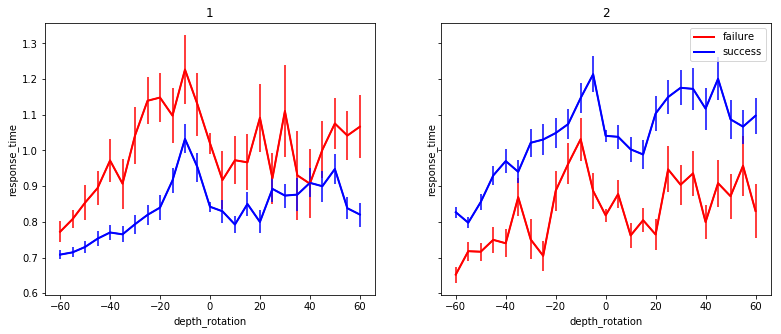

In [104]:
colors = {'success': 'b',
          'failure': 'r'}


pl.suptitle('Mean')

curr_feature = 'depth_rotation'
metric = 'response_time'

fig, axes = pl.subplots(1, 2, figsize=(13,5), sharex=True, sharey=True)
i=0
for obj, tmpd in currdf.groupby(['object']):
    ax = axes[i]
    for outcome, tmpd_by_outcome in tmpd.groupby(['outcome']):

        yv = [g[metric].values for r, g in tmpd_by_outcome.groupby([curr_feature])]
        xv = [np.array([r for _ in np.arange(len(g))]) for r, g in tmpd_by_outcome.groupby([curr_feature])]

        mean_xs = [np.mean(x) for x in xv]
        mean_ys = [np.mean(y) for y in yv]
        sem_ys = [spstats.sem(y) for y in yv]
        
        ax.plot(mean_xs, mean_ys, color=colors[outcome], lw=2, label=outcome)
        ax.errorbar(mean_xs, mean_ys, yerr=sem_ys, color=colors[outcome])

        xvp = np.concatenate(xv).ravel()
        yvp = np.concatenate(yv).ravel()
        #ax.scatter(xvp, yvp, c=colors[outcome], s=10, alpha=0.1)
        
        ax.set_title(obj)
        ax.set_ylabel(metric)
        ax.set_xlabel(curr_feature)

    i += 1
    
#     sns.scatterplot(x='depth_rotation', y='response_time', hue='outcome', data=odf, ax=ax, 
#                 palette='colorblind', alpha=0.7)
ax.legend()

Text(0.5,0.98,'Variance')

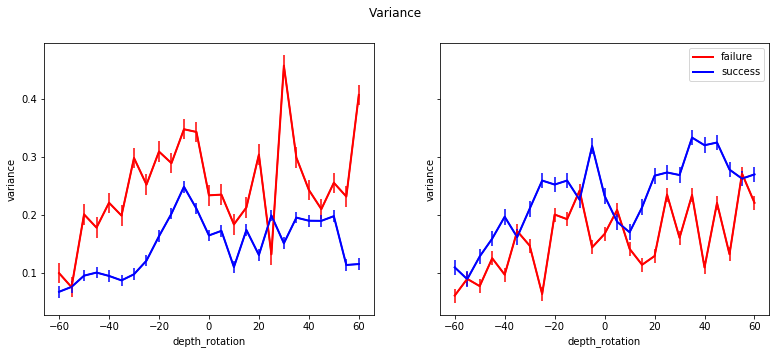

In [105]:
colors = {'success': 'b',
          'failure': 'r'}

curr_feature = 'depth_rotation'
metric = 'variance'

fig, axes = pl.subplots(1, 2, figsize=(13,5), sharex=True, sharey=True)
i=0
for obj, tmpd in currdf.groupby(['object']):
    ax = axes[i]
    for outcome, tmpd_by_outcome in tmpd.groupby(['outcome']):
        
        yv = [g['response_time'].values for r, g in tmpd_by_outcome.groupby([curr_feature])]
        xv = [np.array([r for _ in np.arange(len(g))]) for r, g in tmpd_by_outcome.groupby([curr_feature])]

        feature_values = [np.mean(x) for x in xv]
        response_values = [np.mean(y) for y in yv]
        
        response_values_var = [np.std(y)**2 for y in yv]
        response_sem = spstats.sem(response_values_var)
        ax.plot(feature_values, response_values_var, color=colors[outcome], lw=2, label=outcome)
        ax.errorbar(feature_values, response_values_var, yerr=response_sem, color=colors[outcome])

        xvp = np.concatenate(xv).ravel()
        yvp = np.concatenate(yv).ravel()
        #ax.scatter(xvp, yvp, c=colors[outcome], s=10, alpha=0.1)

        ax.set_ylabel(metric)
        ax.set_xlabel(curr_feature)
    i += 1
ax.legend()

pl.suptitle('Variance')

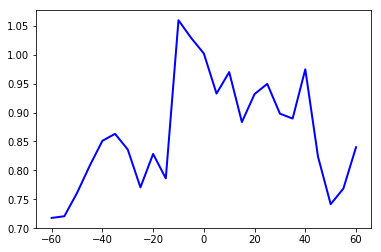

In [20]:
pl.figure()
pl.plot(mean_xs, mean_ys, color=colors[outcome], lw=2)


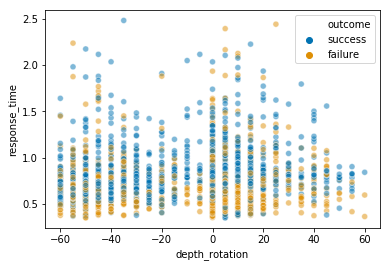

In [21]:
fig, ax = pl.subplots()
sns.scatterplot(x='depth_rotation', y='response_time', hue='outcome', data=currdf[currdf['object']=='2'], ax=ax, 
                palette='colorblind', alpha=0.5)


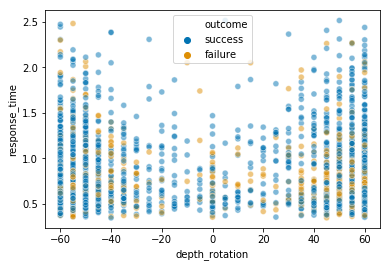

In [320]:
fig, ax = pl.subplots()
sns.scatterplot(x='depth_rotation', y='response_time', hue='outcome', data=currdf[currdf['object']=='2'], ax=ax, 
                palette='colorblind', alpha=0.5)


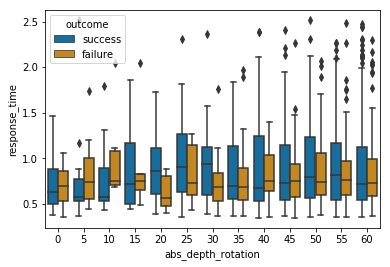

In [326]:
fig, ax = pl.subplots()
sns.boxplot(x='abs_depth_rotation', y='response_time', hue='outcome', data=currdf[currdf['object']=='2'], ax=ax, 
                palette='colorblind') #, alpha=0.7)


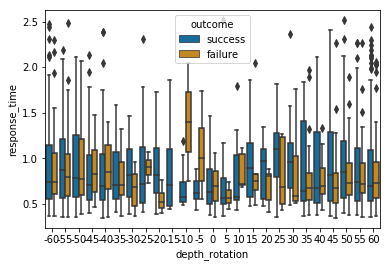

In [327]:
fig, ax = pl.subplots()
sns.boxplot(x='depth_rotation', y='response_time', hue='outcome', data=currdf[currdf['object']=='2'], ax=ax, 
                palette='colorblind') #, alpha=0.7)


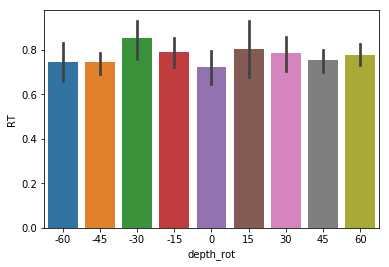

In [111]:
fig, ax = pl.subplots()
sns.barplot(x='depth_rot', y='RT', data=tmpd[tmpd['plane_rot']==0], ax=ax)
